In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('data/final_df.csv', index_col=0)
df_high = df.drop('threshold_medium', axis=1)
df_med = df.drop('threshold_high', axis=1)

In [10]:
# Testing High Threshold
df_train, df_test = train_test_split(df_high, test_size=0.2, random_state=0)
features = list(df_train.columns[:-1])
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(df_train[features])
X_test_norm = scaler.transform(df_test[features])

y_train = df_train['threshold_high']
y_test = df_test['threshold_high']

In [11]:
hparams = {'C': [0.01, 0.1, 1, 10, 100]}
k=10
grid = GridSearchCV(estimator=LinearSVC(random_state=0, max_iter=10000, dual=False, 
                                        class_weight='balanced'),
                    param_grid=hparams, cv=k,
                    return_train_score=True,
                    scoring=['accuracy', 'precision', 'recall'],
                    refit='recall')

grid.fit(X_train_norm, y_train)
y_pred = grid.best_estimator_.predict(X_test_norm)
results = pd.DataFrame(grid.cv_results_)

cols = ['params', 'mean_test_accuracy', 'rank_test_accuracy', 'mean_test_precision',
        'rank_test_precision', 'mean_test_recall', 'rank_test_recall']
results[cols].sort_values(by='rank_test_recall', ascending=True)

,params,mean_test_accuracy,rank_test_accuracy,mean_test_precision,rank_test_precision,mean_test_recall,rank_test_recall
0,{'C': 0.01},0.679050,1,0.427399,1,0.650370,1
1,{'C': 0.1},0.672964,5,0.420612,5,0.648097,2
2,{'C': 1},0.673574,2,0.420696,2,0.643446,3
3,{'C': 10},0.673574,2,0.420696,2,0.643446,3
4,{'C': 100},0.673574,2,0.420696,2,0.643446,3


In [12]:
grid.best_params_

{'C': 0.01}

In [13]:
# Testing Medium Threshold
df_train, df_test = train_test_split(df_med, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(df_train[features])
X_test_norm = scaler.transform(df_test[features])

y_train = df_train['threshold_medium']
y_test = df_test['threshold_medium']

hparams = {'C': [0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(estimator=LinearSVC(random_state=0, max_iter=10000, dual=False, 
                                        class_weight='balanced'),
                    param_grid=hparams, cv=k,
                    return_train_score=True,
                    scoring=['accuracy', 'precision', 'recall'],
                    refit='recall')

grid.fit(X_train_norm, y_train)
y_pred = grid.best_estimator_.predict(X_test_norm)

results = pd.DataFrame(grid.cv_results_)

cols = ['params', 'mean_test_accuracy', 'rank_test_accuracy', 'mean_test_precision',
        'rank_test_precision', 'mean_test_recall', 'rank_test_recall']
results[cols].sort_values(by='rank_test_recall', ascending=True)

,params,mean_test_accuracy,rank_test_accuracy,mean_test_precision,rank_test_precision,mean_test_recall,rank_test_recall
2,{'C': 1},0.736316,1,0.898759,2,0.728342,1
3,{'C': 10},0.735706,2,0.897926,4,0.728342,1
4,{'C': 100},0.734494,3,0.896775,5,0.727536,3
1,{'C': 0.1},0.734486,4,0.898413,3,0.725883,4
0,{'C': 0.01},0.732044,5,0.903632,1,0.716873,5


In [15]:
grid.best_params_ 

{'C': 1}

<AxesSubplot:>

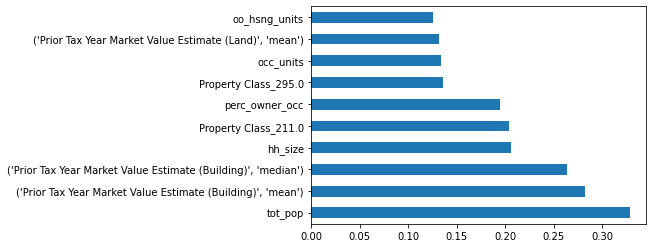

In [14]:
pd.Series(abs(grid.best_estimator_.coef_[0]), index=features).nlargest(10).plot(kind='barh')

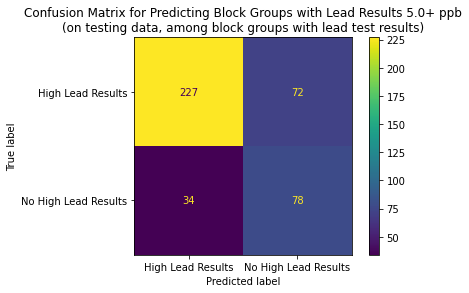


Test Accuracy: 0.7421
Test Precision: 0.8697
Test Recall: 0.7592



In [85]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score, precision_score, recall_score

cm = plot_confusion_matrix(
    estimator=grid.best_estimator_, 
    X=X_test_norm, y_true=y_test, labels=[1,0], 
    display_labels=['High Lead Results', 'No High Lead Results'])
plt.grid(linestyle='')
plt.title('Confusion Matrix for Predicting Block Groups with Lead Results 5.0+ ppb\n' + 
         '(on testing data, among block groups with lead test results)')
plt.show()

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
precision = precision_score(y_true=y_test, y_pred=y_pred)
recall = recall_score(y_true=y_test, y_pred=y_pred)

print(f'''
Test Accuracy: {round(accuracy, 4)}
Test Precision: {round(precision, 4)}
Test Recall: {round(recall, 4)}
''')